In [78]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_profiling
from IPython.display import display

plt.style.use("seaborn-pastel")
plt.rcParams['figure.figsize'] = (10, 7)

In [79]:
df = pd.read_csv('data/streaming_history.csv', parse_dates=['endTime'])
tracks_df = pd.read_csv('data/tracks.csv', parse_dates=['album_release_date'])
features_df = pd.read_csv('data/features.csv')

df.dropna(inplace=True)

df = df.merge(tracks_df, left_on='id_', right_on='id_', suffixes=('stream_', 'track_'))\
       .merge(features_df, left_on='id_', right_on='id_', suffixes=('stream_', 'feature_'))

In [80]:
cols = [
    'popularity', 'danceability', 'energy', 'key', 'loudness',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'time_signature'
]

In [81]:
df = df.groupby('artist+track').aggregate({col: 'min' for col in cols})

In [100]:
norm_df = ((df - df.mean()) / df.std())
# norm_df = ((df - df.min()) / (df.max() - df.min()))

In [101]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=2.5, min_samples=3).fit(df)

In [102]:
labels = pd.Series(clustering.labels_, index=df.index)

<AxesSubplot:>

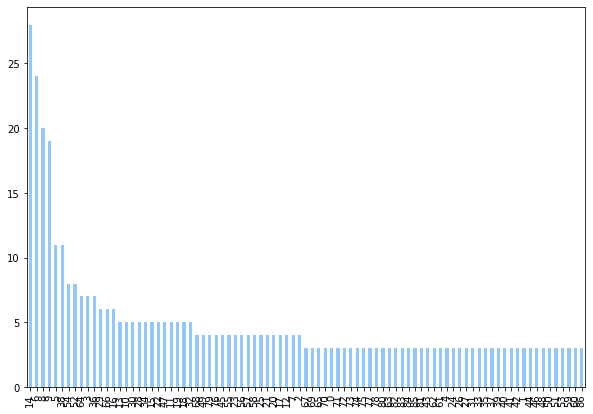

In [103]:
labels[labels != -1].value_counts().plot(kind='bar')

In [104]:
labels[labels == 14].index.tolist()

['Arcis The Arcane Arts',
 'Bent To Be Loved',
 'CHVRCHES Gun',
 "Charlotte Gainsbourg Ring-A-Ring O' Roses",
 'Chromatics Hands In The Dark',
 'Computer Magic Fuzz',
 'Crystal Castles 1991',
 'Crystal Castles Crymewave - VERDUGO Remix',
 'Crystal Castles Good Time',
 'Crystal Castles Reckless',
 "Dominique A J'avais oublié que tu m'aimais autant",
 'Franz Ferdinand Feel The Love Go',
 'Hatari Engin Miskunn',
 'HÆLOS Kyoto',
 'IAMX After Every Party I Die',
 'IAMX This Will Make You Love Again',
 'Marie Madeleine Swimming Pool',
 'Molecule Praïa Do Norte',
 'Mr. Oizo The Church',
 'Priest The Pit',
 'Rex The Dog Do You Feel What I Feel',
 'Róisín Murphy Narcissus - Extended Mix',
 'Spector All The Sad Young Men',
 'TR/ST Gone',
 'The Dø Keep Your Lips Sealed',
 'The Juan Maclean A Simple Design',
 'Yeasayer Fluttering In The Floodlights',
 'Zamilska Duel 35']

corr plot  
pca  
wind rose  
elbow method  

In [105]:
import seaborn as sns

<AxesSubplot:>

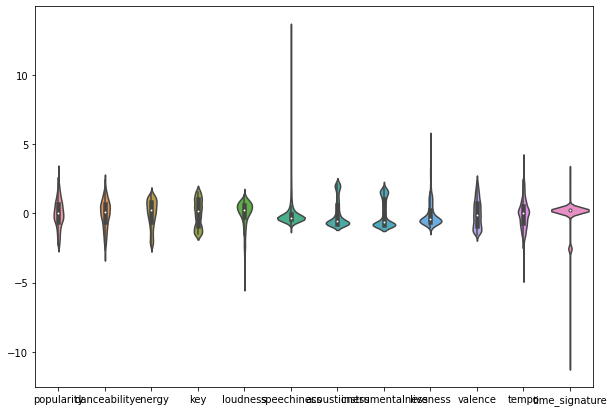

In [106]:
sns.violinplot(data=norm_df)

In [107]:
filter_outliers_cond = ((norm_df.quantile(0.02) <= norm_df) & 
                        (norm_df <= norm_df.quantile(0.98)))\
                       .all(axis=1)
display('Percent of records with at least one outlier feature '
        f'{(1 - filter_outliers_cond.sum() / norm_df.shape[0]) * 100 :.2f}%')
norm_df = norm_df[filter_outliers_cond]

'Percent of records with at least one outlier feature 28.84%'

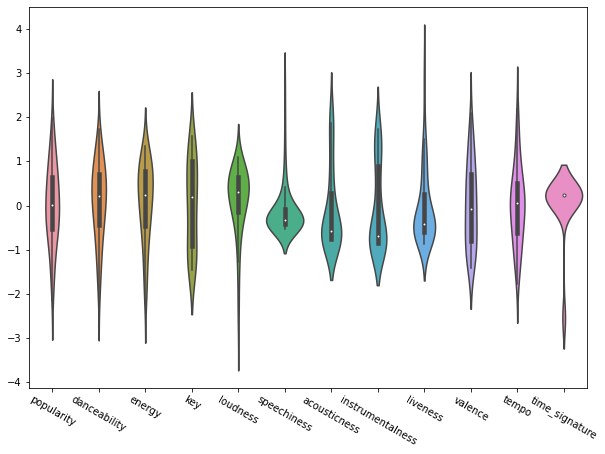

In [115]:
ax = sns.violinplot(data=norm_df, bw=.5)
plt.xticks(rotation=-30);

<AxesSubplot:>

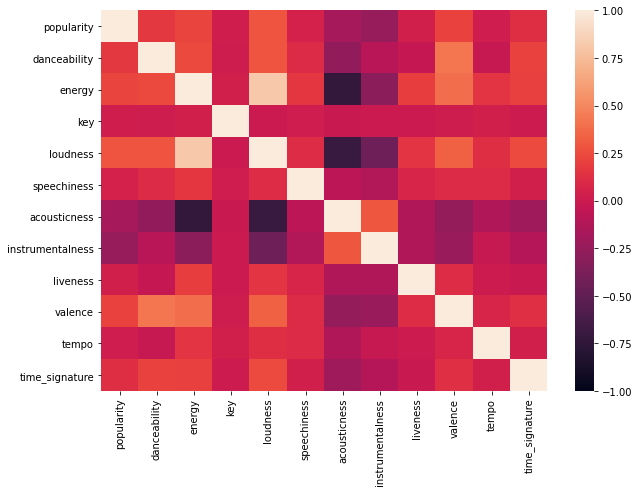

In [119]:
sns.heatmap(norm_df.corr(), vmin=-1, vmax=1)

<ipython-input-123-204b887e7ed0>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


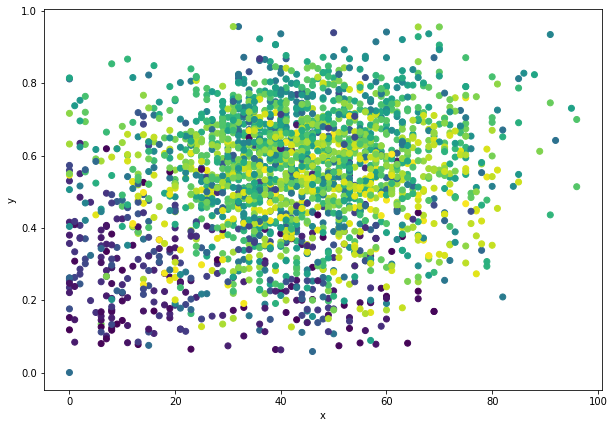

In [123]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=3)
pca_result = pca.fit_transform(norm_df)
pca_df=pd.DataFrame(pca_result)

fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(df.iloc[:, 0].values, df.iloc[:, 1].values, c=df.iloc[:, 2].values)
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.show()